# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 31 октября 2023 23:59

Мягкий дедлайн: 23:59 MSK 14 ноября 2023 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 ноября 2023.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [ ]:
%pylab inline
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [ ]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
lasso = Lasso()

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("X_train shape:", X_train.shape)

print("Ridge:", ridge.coef_)
print("Lasso:", lasso.coef_)

X_train shape: (309, 10)
Ridge: [  20.86588099  -58.00039065  231.2704688   186.67010355   33.31087207
   -2.16994737 -150.95049376  141.35036492  250.75391278  123.18025806]
Lasso: [  0.           0.         274.33128438  48.57203696   0.
   0.          -0.           0.         424.12142666   0.        ]


*Считаем, что вес близок к нулю, если его абсолютное значение меньше $10^{-5}$.*

In [ ]:
def close_to_zero_count(weights):
    without_bias = weights[1:]
    return len(without_bias[np.abs(without_bias) < 1e-5])


def far_from_zero_count(weights):
    return len(weights) - close_to_zero_count(weights)

In [ ]:
print("Число ненулевых коэффициентов для параметров по умолчанию (Ridge c alpha=1.0) =", far_from_zero_count(ridge.coef_))
print("Число ненулевых коэффициентов для параметров по умолчанию (Lasso с alpha=1.0) =", far_from_zero_count(lasso.coef_))

print("Ridge:", ridge.coef_)
print("Lasso:", lasso.coef_)

Число ненулевых коэффициентов для параметров по умолчанию (Ridge c alpha=1.0) = 10
Число ненулевых коэффициентов для параметров по умолчанию (Lasso с alpha=1.0) = 4
Ridge: [  20.86588099  -58.00039065  231.2704688   186.67010355   33.31087207
   -2.16994737 -150.95049376  141.35036492  250.75391278  123.18025806]
Lasso: [  0.           0.         274.33128438  48.57203696   0.
   0.          -0.           0.         424.12142666   0.        ]


In [ ]:
ridge_nonzero_counts = np.array([])
lasso_nonzero_counts = np.array([])

for param in np.logspace(-3, 8, 1000):
    ridge = Ridge(alpha=param)
    lasso = Lasso(alpha=param)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    ridge_nonzero_counts = np.append(ridge_nonzero_counts, far_from_zero_count(ridge.coef_))
    lasso_nonzero_counts = np.append(lasso_nonzero_counts, far_from_zero_count(lasso.coef_))

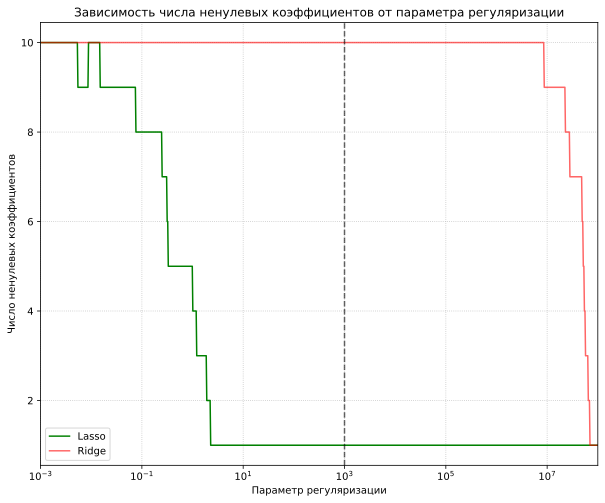

In [ ]:
from matplotlib.ticker import LogLocator

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Зависимость числа ненулевых коэффициентов от параметра регуляризации')
plt.xlabel('Параметр регуляризации')
plt.ylabel('Число ненулевых коэффициентов')

plt.xscale("log")
plt.xlim(1e-3, 1e+8)
ax.xaxis.set_minor_locator(LogLocator())
ax.grid(alpha=0.8, linestyle=':')

ax.plot(np.logspace(-3, 8, 1000), lasso_nonzero_counts, color='green', label='Lasso')
ax.plot(np.logspace(-3, 8, 1000), ridge_nonzero_counts, color='red', alpha=0.6, label='Ridge')
plt.axvline(x = 1e+3, color = 'black', alpha=0.6, linestyle='--')
plt.legend()
plt.show()

При построении графиков **не учитывался** коэффициент $w_0$. Он отвечает за смещение, и его нет смысла регуляризировать, так как регуляризация в первую очередь нужна из-за мультиколлинеарности, возможных ошибок в данных и больших по норме результирующих весов, которые будут эту ошибку сильно увеличивать. При этом ошибку будут увеличивать только те веса, которые входят в скалярное произведение линейной модели $\langle w, \: x \rangle$

Ожидания полностью оправдались, так как именно при $L1$-регуляризации ($Lasso$), зануление весов происходит быстрее и менее гладко, чем при $L2$-регуляризации. По графику видно, что на отрезке $[10^{-3}, 10^{3}] \:$ $L2$-регуляризация не зануляет веса полностью, как это делает $L1$

Важно отметить, что в данном случае для $L2$-регуляризации веса полностью не зануляются, а становятся достаточно малыми, чтобы считать их нулевыми ($|w| < 10^{-5}$). Это видно для $alpha > 10^{7}$

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statistics import median

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
mae_test_first = mean_absolute_error(y_test, y_pred)
rmse_test_first = mean_squared_error(y_test, y_pred, squared=False)
r2_test_first = r2_score(y_test, y_pred)
print('TEST\n')
print("MAE:", mae_test_first)
print("RMSE:", rmse_test_first)
print("R\u00B2:", r2_test_first, end='\n\n')


y_pred_tr = ridge.predict(X_train)
print('TRAIN\n')
print("MAE:", mean_absolute_error(y_train, y_pred_tr))
print("RMSE:", mean_squared_error(y_train, y_pred_tr, squared=False))
print("R\u00B2:", r2_score(y_train, y_pred_tr), end='\n\n')

TEST

MAE: 49.602750809651916
RMSE: 58.30429511391227
R²: 0.3599020220009461

TRAIN

MAE: 48.415547518370865
RMSE: 58.32713753879843
R²: 0.45095857829505925



Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold


# from sklearn.metrics import get_scorer_names
ridge = Ridge()
grid1 = GridSearchCV(ridge, {'alpha': np.logspace(-6, 6, 1000)}, scoring=make_scorer(mean_absolute_error, greater_is_better=False), n_jobs=-1, cv=KFold(n_splits=5, shuffle=True, random_state=4), return_train_score=True, verbose=1)
grid2 = GridSearchCV(ridge, {'alpha': np.logspace(-6, 6, 1000)}, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False), n_jobs=-1, cv=KFold(n_splits=5, shuffle=True, random_state=4), return_train_score=True, verbose=1)
grid3 = GridSearchCV(ridge, {'alpha': np.logspace(-6, 6, 1000)}, scoring='r2', n_jobs=-1, cv=KFold(n_splits=5, shuffle=True, random_state=4), return_train_score=True, verbose=1)
grid1.fit(X_train, y_train)
grid2.fit(X_train, y_train)
grid3.fit(X_train, y_train)
print('Best for MAE:')
print('Alpha=', grid1.best_params_['alpha'])
print('Score=', abs(grid1.best_score_))

print('Best for RMSE:')
print('Alpha=', grid2.best_params_['alpha'])
print('Score=', abs(grid2.best_score_))

print('Best for R\u00B2:')
print('Alpha=', grid3.best_params_['alpha'])
print('Score=', grid3.best_score_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best for MAE:
Alpha= 0.0010351779556301763
Score= 43.6406037348602
Best for RMSE:
Alpha= 0.00243998629725955
Score= 55.22350941979018
Best for R²:
Alpha= 0.055557762223988776
Score= 0.47143688812611995


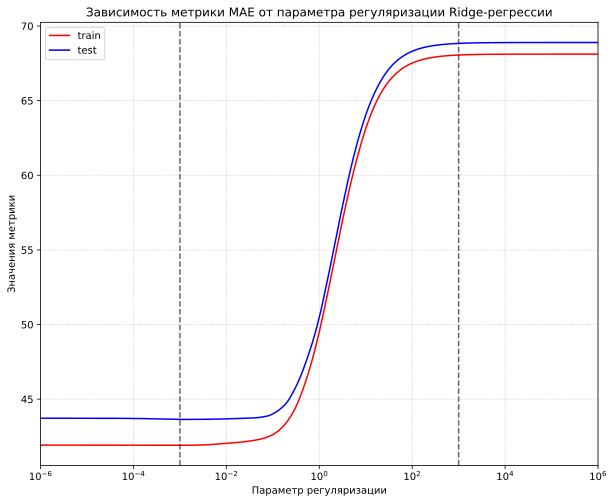

In [ ]:
# MAE

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Зависимость метрики MAE от параметра регуляризации Ridge-регрессии')
plt.xlabel('Параметр регуляризации')
plt.ylabel('Значения метрики')

plt.xscale("log")
plt.xlim(1e-6, 1e+6)
ax.xaxis.set_minor_locator(LogLocator())
ax.grid(alpha=0.8, linestyle=':')

ax.plot(np.logspace(-6, 6, 1000), np.abs(grid1.cv_results_['mean_train_score']), color='red', alpha=1, label='train')
ax.plot(np.logspace(-6, 6, 1000), np.abs(grid1.cv_results_['mean_test_score']), color='blue', alpha=1, label='test')
plt.axvline(x = 1e-3, color = 'black', alpha=0.6, linestyle='--')
plt.axvline(x = 1e+3, color = 'black', alpha=0.6, linestyle='--')
plt.legend()
plt.show()

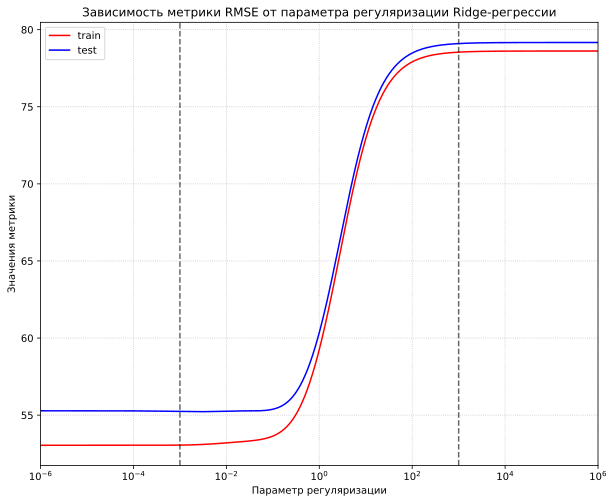

In [ ]:
# RMSE

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Зависимость метрики RMSE от параметра регуляризации Ridge-регрессии')
plt.xlabel('Параметр регуляризации')
plt.ylabel('Значения метрики')

plt.xscale("log")
plt.xlim(1e-6, 1e+6)
ax.xaxis.set_minor_locator(LogLocator())
ax.grid(alpha=0.8, linestyle=':')

ax.plot(np.logspace(-6, 6, 1000), np.abs(grid2.cv_results_['mean_train_score']), color='red', alpha=1, label='train')
ax.plot(np.logspace(-6, 6, 1000), np.abs(grid2.cv_results_['mean_test_score']), color='blue', alpha=1, label='test')
plt.axvline(x = 1e-3, color = 'black', alpha=0.6, linestyle='--')
plt.axvline(x = 1e+3, color = 'black', alpha=0.6, linestyle='--')
plt.legend()
plt.show()

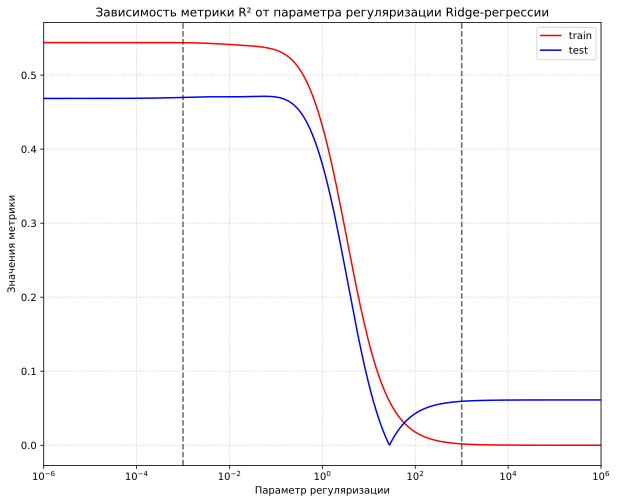

In [ ]:
# R2_score

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Зависимость метрики R\u00B2 от параметра регуляризации Ridge-регрессии')
plt.xlabel('Параметр регуляризации')
plt.ylabel('Значения метрики')

plt.xscale("log")
plt.xlim(1e-6, 1e+6)
ax.xaxis.set_minor_locator(LogLocator())
ax.grid(alpha=0.8, linestyle=':')

ax.plot(np.logspace(-6, 6, 1000), np.abs(grid3.cv_results_['mean_train_score']), color='red', alpha=1, label='train')
ax.plot(np.logspace(-6, 6, 1000), np.abs(grid3.cv_results_['mean_test_score']), color='blue', alpha=1, label='test')
plt.axvline(x = 1e-3, color = 'black', alpha=0.6, linestyle='--')
plt.axvline(x = 1e+3, color = 'black', alpha=0.6, linestyle='--')
plt.legend()
plt.show()

По результатам перебора гиперпараметра $alpha$ для $Ridge$-регрессии видно, что качество улучшилось не так значительно. Графики показывают, что чем меньше параметр регуляризации, тем лучше качество итоговой модели. Однако вне отрезка $[10^{-3}, \: 10^{3}]$ значений гиперпараметра $alpha$ качество практически не изменяется

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import cross_val_predict

best_ridge = Ridge(alpha=grid2.best_params_['alpha'])

y_pred = cross_val_predict(best_ridge, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=4), n_jobs=-1)
errors = np.abs(y_train - y_pred)

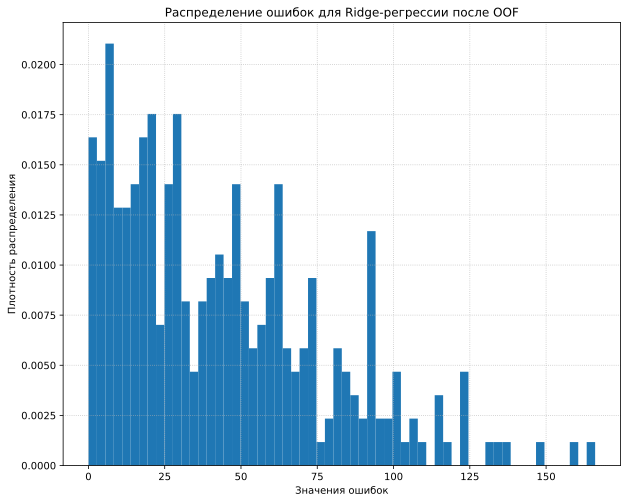

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Распределение ошибок для Ridge-регрессии после OOF')
plt.xlabel('Значения ошибок')
plt.ylabel('Плотность распределения')

plt.hist(errors, bins=60, density=True)
plt.grid(alpha=0.8, linestyle=':')
plt.show()

По распределению ошибок видно, что в обучающей выборке действительно имеются выбросы. Под выбросами в данном случае будем понимать те объекты, ошибки на которых превышают сумму среднего значения ошибок и их дисперсии

In [ ]:
mean_errors = np.mean(errors)
std_errors = np.std(errors)

print("Среднее значение ошибок:", np.mean(errors))
print("Дисперсия ошибок:", np.std(errors))

Среднее значение ошибок: 43.642602138119
Дисперсия ошибок: 33.985858127254446


Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
error_indices = (errors >= mean_errors + std_errors).nonzero()
X_train = np.delete(X_train, error_indices, axis=0)
y_train = np.delete(y_train, error_indices, axis=0)

In [ ]:
best_ridge = Ridge(alpha=grid2.best_params_['alpha'])
best_ridge.fit(X_train, y_train)
y_pred = best_ridge.predict(X_test)


print('BEFORE MODIFICATION (TEST)\n')
print("MAE:", mae_test_first)
print("RMSE:", rmse_test_first)
print("R\u00B2:", r2_test_first, end='\n\n')

print('VALIDATION DATASET\n')
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R\u00B2:", r2_score(y_test, y_pred), end='\n\n')

BEFORE MODIFICATION (TEST)

MAE: 49.602750809651916
RMSE: 58.30429511391227
R²: 0.3599020220009461

VALIDATION DATASET

MAE: 46.50649070201844
RMSE: 55.84854181679186
R²: 0.4126877847916568



**Ответ:** На валидационной выборке качество немного улучшилось после удаления объектов-выбросов. Это объясняется тем, что объекты-выбросы мешают при обучении модели, ибо модель подстраивается под них, тем самым отходя от истинной зависимости. Такие объекты являются "исключениями" из предполагаемой регрессионной закономерности, которые вносят лишний вклад в функцию потерь, минимизация которой должна учитывать ошибку на этих объектах. Разные метрики в различной степени учитывают объекты-выбросы, что важно для различного рода задач.



## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=2000)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=2000)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

ROC-AUC: 0.9257804792311646



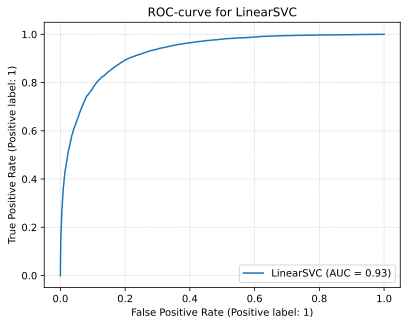

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay, auc

display_roc = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC-curve for LinearSVC')
print('ROC-AUC:', display_roc.roc_auc, end='\n\n')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

PR-AUC: 0.9246021526998194



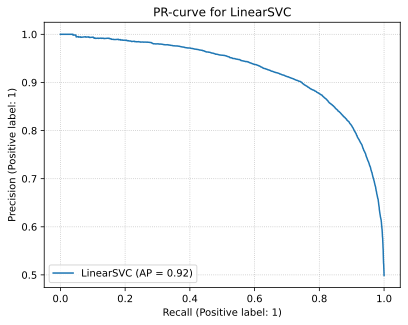

In [ ]:
display_pr = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.title('PR-curve for LinearSVC')
print('PR-AUC:', auc(display_pr.recall, display_pr.precision), end='\n\n')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабораторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

ROC-AUC: 0.9073660714285714


[]

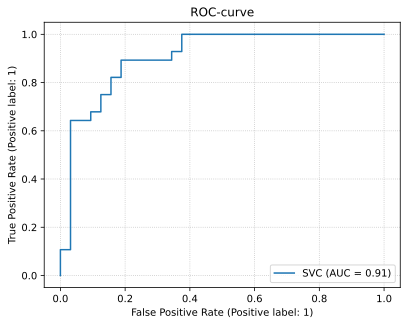

In [ ]:
display_newroc = RocCurveDisplay.from_estimator(model, X_test, y_test)
print("ROC-AUC:", display_newroc.roc_auc)
plt.title('ROC-curve')
plt.grid(alpha=0.8, linestyle=':')
plt.plot()

PR-AUC: 0.8669934000589682



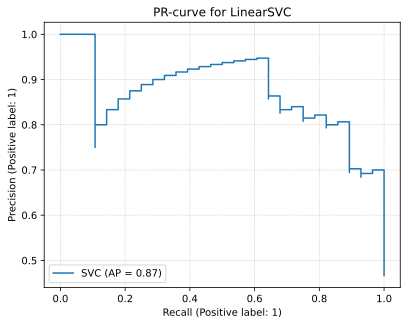

In [ ]:
display_newpr = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('PR-curve for LinearSVC')
print('PR-AUC:', auc(display_newpr.recall, display_newpr.precision), end='\n\n')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

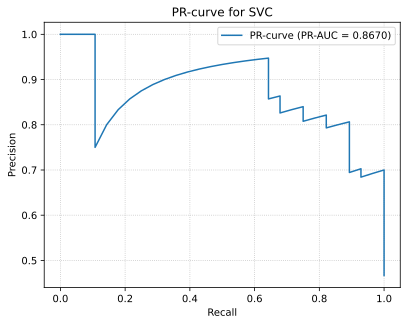

In [ ]:
# Альтернативный и более правильный способ построения PR-кривой
from sklearn.metrics import precision_recall_curve

temp_precision, temp_recall, _ = precision_recall_curve(y_test, model.decision_function(X_test))
plt.plot(temp_recall, temp_precision, label='PR-curve (PR-AUC = %.4f)' % auc(temp_recall, temp_precision))
plt.grid(alpha=0.8, linestyle=':')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR-curve for SVC')
plt.legend()
plt.show()

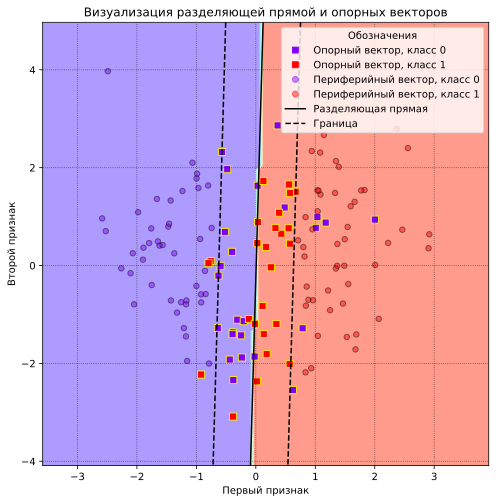

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import Colormap

_, ax = plt.subplots(figsize=(8, 8))
x_min, x_max, y_min, y_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel='Первый признак', ylabel='Второй признак')


display_hyper = DecisionBoundaryDisplay.from_estimator(model, X_train, ax=ax, plot_method='contourf', response_method="predict", alpha=0.5, cmap=plt.cm.rainbow)
display_borders = DecisionBoundaryDisplay.from_estimator(model, X_train, ax=ax, response_method="decision_function", plot_method="contour",
                                                         levels=[-1, 0, 1],
                                                         colors=["k", "k", "k"],
                                                         linestyles=["--", "-", "--"])

not_support_indices = [x for x in list(range(X_train.shape[0])) if x not in model.support_.tolist()]

sup_scat = ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], c=y_train[model.support_], s=50, edgecolor='yellow', cmap=plt.cm.rainbow, marker='s', linewidth=0.8)

not_sup_scat = ax.scatter(X_train[not_support_indices, 0], X_train[not_support_indices, 1], s=30, c=y_train[not_support_indices], edgecolor="k", cmap=plt.cm.rainbow, alpha=0.45)
plt.grid(alpha=0.6, linestyle=':', color='black')
labels = ['Граница', 'Разделяющая прямая']
plt.title('Визуализация разделяющей прямой и опорных векторов')

proxy = [plt.Line2D([0], [0], linestyle='-', color='black'), plt.Line2D([0], [0], linestyle='--', color='black')]

plt.legend(handles=[*sup_scat.legend_elements()[0], *not_sup_scat.legend_elements()[0], *proxy],
           labels=['Опорный вектор, класс 0', 'Опорный вектор, класс 1', 'Периферийный вектор, класс 0', 'Периферийный вектор, класс 1', 'Разделяющая прямая', 'Граница'], title='Обозначения')
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [ ]:
def plot_calibration_curve(y_test, preds, color, label):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2)  # Исправлено: (l - r) / 2 ---> (l + r) / 2
        interval = y_test[(preds >= l) & (preds < r)]
        # Исправлено: убран np.min
        if interval.shape[0] != 0:
            bin_real_ratios.append(np.count_nonzero(interval) / interval.shape[0])
        else:
            bin_real_ratios.append(0)
    # Скорректирована отрисовка кривых
    plt.plot(bin_middle_points, bin_real_ratios, marker='o', color=color, label=label, alpha=0.7)


def plot_perfect_calibration(y_test, pred):
    bin_middle_points = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2)

    plt.scatter(bin_middle_points, bin_middle_points, marker='o', color='orange')
    plt.plot(np.linspace(0, 1, n_bins), np.linspace(0, 1, n_bins), color='orange', label='Идеальная кривая', alpha=0.6)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [ ]:
# Обучение логистической регрессии
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

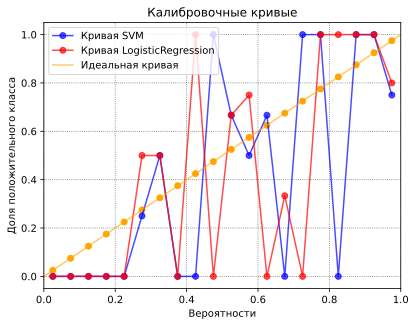

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Строим калибровочные кривые для вероятностей положительного класса
from scipy.special import expit

get_decisions = model.decision_function(X_test)
svm_probs = expit(get_decisions)

plot_calibration_curve(y_test, svm_probs, color='blue', label='Кривая SVM')
plot_calibration_curve(y_test, lr_clf.predict_proba(X_test)[:, 1], color='red', label='Кривая LogisticRegression')
plot_perfect_calibration(y_test, svm_probs)
plt.xlim(0, 1)
plt.title('Калибровочные кривые')
plt.xlabel('Вероятности')
plt.ylabel('Доля положительного класса')
plt.legend()
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.show()

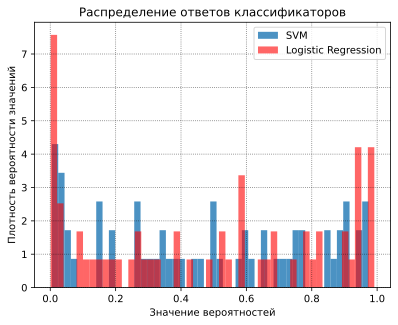

In [ ]:
# Распределение ответов классификаторов

plt.hist(svm_probs, bins=50, density=True, alpha=0.8, label='SVM')
plt.hist(lr_clf.predict_proba(X_test)[:, 1], bins=50, density=True, color='red', alpha=0.6, label='Logistic Regression')
plt.title('Распределение ответов классификаторов')
plt.xlabel('Значение вероятностей')
plt.ylabel('Плотность вероятности значений')
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.legend()
plt.show()

Гистограммы распределения и калибровочные кривые примерно похожи. Схожесть объясняется тем, что эти модели обе линейные, но обучение происходит через минимизацию разных функций потерь.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

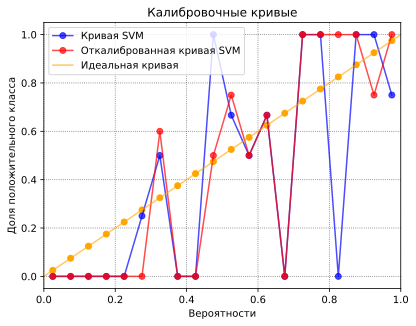

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.calibration import CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(model, cv=5)
calibrated_model.fit(X_train, y_train)
new_svm_probs = calibrated_model.predict_proba(X_test)[:, 1]

plot_calibration_curve(y_test, svm_probs, color='blue', label='Кривая SVM')
plot_calibration_curve(y_test, new_svm_probs, color='red', label='Откалиброванная кривая SVM')
plot_perfect_calibration(y_test, svm_probs)
plt.xlim(0, 1)
plt.title('Калибровочные кривые')
plt.xlabel('Вероятности')
plt.ylabel('Доля положительного класса')
plt.legend()
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.show()

Калибровочная кривая немного улучшилась, так как точки немного приблизились к идеальной модели (диагонали)

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

Данный метод калибровки вероятностей заключается в следующем:

1. Проводится разбиение отрезка $[0,\: 1]$ на бины $\mathbb{B}_i$ одинаковой мощности.
2. Все объекты распределяются по бинам в соответствии с вероятностями, которые предсказывает наша модель
3. Считается доля положительного класса для объектов в каждом бине
4. Далее эти доли сохраняются, так как будут использоваться для предсказания вероятности в дальнейшем.
5. На предикте каждому объекту, который попадает в соответствующий бин (по вероятности, которую предсказывает модель), будет присваиваться вероятность, которая получена при подсчёте на обучающей выборке.
6. Данный подход реализован простейшим образом с использованием KFold-кросс-валидации на фите для усреднения результата

По результатам видно, что такой подход ухудшает качество клабировки. Также одним из минусов служит подбор количества бинов разбиения отрезка $[0, \: 1]$, а также число разбиений обучающей выборки

In [ ]:
## ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from scipy.special import expit
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

class HistCalibrationCV:
    def __init__(self, estimator, cv_fit=6):
        self.coef_ = None
        self.cv_fit = cv_fit
        self.estimator = estimator
        self._cross_estimator = self.CustomEstimator(estimator)

    @staticmethod
    def pred_error(y_test, preds):
        bin_middle_points = []
        bin_real_ratios = []
        n_bins = 20
        for i in range(n_bins):
            l = 1.0 / n_bins * i
            r = 1.0 / n_bins * (i + 1)
            bin_middle_points.append((r + l) / 2)
            interval = y_test[(preds >= l) & (preds < r)]
            if interval.shape[0] != 0:
                bin_real_ratios.append(np.count_nonzero(interval) / interval.shape[0])
            else:
                bin_real_ratios.append(0)
        return mean_absolute_error(bin_real_ratios, bin_middle_points)

    def fit(self, x, y):
        min_mae = 1e8
        ideal_coef = None
        estim_kf = KFold(n_splits=self.cv_fit, shuffle=True, random_state=42)

        for i, (train_ind, test_ind) in enumerate(estim_kf.split(x, y)):
            for bean_val in np.arange(70, 80):
                for cv_val in np.arange(15, 20):
                    self._cross_estimator = self.CustomEstimator(self.estimator, bean_val, cv_val)
                    self._cross_estimator.fit(x[train_ind], y[train_ind])
                    self.coef_ = self._cross_estimator.thetas
                    if ideal_coef is None:
                        ideal_coef = self.coef_

                    probs = self.predict_proba(x[test_ind])

                    if HistCalibrationCV.pred_error(y[test_ind], probs) < min_mae:
                        min_mae = HistCalibrationCV.pred_error(y[test_ind], probs)
                        ideal_coef = self.coef_
        self.coef_ = ideal_coef
        return self

    def predict_proba(self, x):
        return self._cross_estimator.transform(x)

    class CustomEstimator(BaseEstimator):
        def __init__(self, estimator, n_beans=20, cv=5):
            self.real_estim = estimator
            self.n_beans = n_beans
            self.thetas = None
            self.beans = None
            self.cv = cv

        def fit(self, x, y):
            self.beans = []
            for i in range(self.n_beans):
                l = 1 / self.n_beans * i
                r = 1 / self.n_beans * (i + 1)
                self.beans.append([l ,r])

            new_x = np.identity(self.n_beans)

            kf = KFold(n_splits=self.cv, shuffle=True, random_state=42)
            kfold_new_y = []
            for train_index, _ in kf.split(x):
                new_y = np.array([])

                self.real_estim.fit(x[train_index], y[train_index])
                get_decisions = self.real_estim.decision_function(x[train_index])
                q = expit(get_decisions)

                for i in range(self.n_beans):
                    q_in_bean = y[train_index][(q >= self.beans[i][0]) & (q <= self.beans[i][1])]
                    in_bean = np.sum(q_in_bean)
                    if in_bean == 0:
                        new_y = np.append(new_y, 0)
                    else:
                        new_y = np.append(new_y, np.sum(q_in_bean) / q_in_bean.shape[0])

                kfold_new_y.append(new_y)
            self.thetas = np.mean(kfold_new_y, axis=0)

            return self


        def transform(self, x):
            if self.thetas is None:
                return None
            get_decisions = self.real_estim.decision_function(x)
            q = expit(get_decisions)
            answer = np.zeros_like(q)

            for i in range(self.n_beans):
                q_in_bean = np.where((q >= self.beans[i][0]) & (q <= self.beans[i][1]), 1, 0)
                answer = np.array([self.thetas[i] if q_in_bean[j] else answer[j] for j in range(q.shape[0])])
            return answer

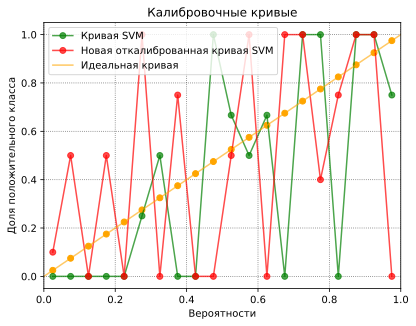

In [ ]:
my_calibrated_model = HistCalibrationCV(model)
my_calibrated_model.fit(X_train, y_train)
my_svm_probs = my_calibrated_model.predict_proba(X_test)

plot_calibration_curve(y_test, svm_probs, color='green', label='Кривая SVM')
# plot_calibration_curve(y_test, new_svm_probs, color='blue', label='Старая откалиброванная кривая SVM')
plot_calibration_curve(y_test, my_svm_probs, color='red', label='Новая откалиброванная кривая SVM')
plot_perfect_calibration(y_test, svm_probs)
plt.xlim(0, 1)
plt.title('Калибровочные кривые')
plt.xlabel('Вероятности')
plt.ylabel('Доля положительного класса')
plt.legend()
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.show()

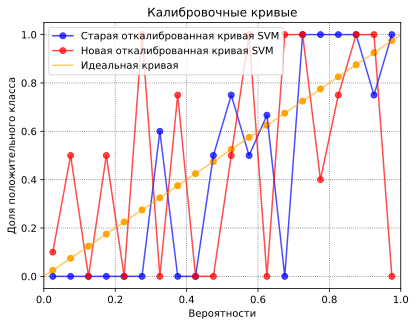

In [ ]:
plot_calibration_curve(y_test, new_svm_probs, color='blue', label='Старая откалиброванная кривая SVM')
plot_calibration_curve(y_test, my_svm_probs, color='red', label='Новая откалиброванная кривая SVM')
plot_perfect_calibration(y_test, svm_probs)
plt.xlim(0, 1)
plt.title('Калибровочные кривые')
plt.xlabel('Вероятности')
plt.ylabel('Доля положительного класса')
plt.legend()
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.show()

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wishby","key":"58d66b7bb562a289d1dc5133be856141"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

 91% 70.0M/76.5M [00:01<00:00, 64.6MB/s]
100% 76.5M/76.5M [00:01<00:00, 56.7MB/s]


In [ ]:
!mkdir train

In [ ]:
!unzip porto-seguro-safe-driver-prediction.zip -d porto-seguro-safe-driver-prediction

Archive:  porto-seguro-safe-driver-prediction.zip
  inflating: porto-seguro-safe-driver-prediction/sample_submission.csv  
  inflating: porto-seguro-safe-driver-prediction/test.csv  
  inflating: porto-seguro-safe-driver-prediction/train.csv  


In [ ]:
data = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [ ]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)
X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [ ]:
data.head()

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
id                                                                           
783681           0              2          0              1              0   
636497           0              1          6              1              0   
659813           2              1          3              1              0   
334742           0              1         10              0              0   
1156570          0              1          9              0              6   

         ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
id                                                                    
783681               1              0              0              0   
636497               0              1              0              0   
659813               1              0              0              0   
334742               1              0              0              0   
1156570              1              0              0              0   

         ps_ind_10_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
id                      ...                                                   
783681               0  ...           3           1           5           9   
636497               0  ...           5           2           1          10   
659813               0  ...           3           1           1           8   
334742               0  ...           7           2           2          11   
1156570              0  ...           8           1           1           8   

         ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
id                                                                        
783681                0               0               1               0   
636497                0               1               1               0   
659813                0               1               1               0   
334742                0               0               1               1   
1156570               0               1               0               0   

         ps_calc_19_bin  ps_calc_20_bin  
id                                       
783681                1               0  
636497                1               0  
659813                0               0  
334742                0               0  
1156570               1               0  

[5 rows x 57 columns]

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
lg_clf = LogisticRegression(max_iter=500, n_jobs=-1, random_state=42)
lg_clf.fit(X_train, y_train)
preds = lg_clf.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", mean_squared_error(y_test, preds, squared=False))
print("R\u00B2:", r2_score(y_test, preds), end='\n\n')

MAE: 0.41065
RMSE: 0.6408197874597819
R²: -0.6426000236534406



Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

ROC-AUC: 0.625057783800832



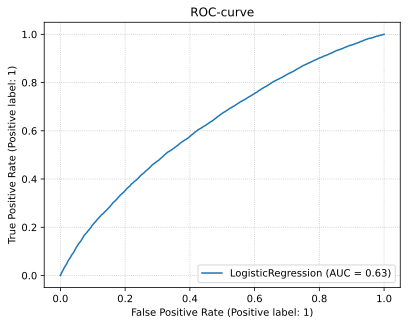

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
display_kaggle_roc = RocCurveDisplay.from_estimator(lg_clf, X_test, y_test)
print("ROC-AUC:", display_kaggle_roc.roc_auc, end='\n\n')
plt.title('ROC-curve')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

PR-AUC: 0.6128759265737703



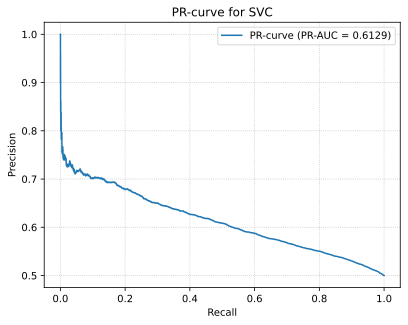

In [ ]:
temp_precision, temp_recall, _ = precision_recall_curve(y_test, lg_clf.decision_function(X_test))
print("PR-AUC:", auc(temp_recall, temp_precision), end='\n\n')
plt.plot(temp_recall, temp_precision, label='PR-curve (PR-AUC = %.4f)' % auc(temp_recall, temp_precision))
plt.grid(alpha=0.8, linestyle=':')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR-curve for SVC')
plt.legend()
plt.show()

**Ответ:** По виду ROC и PR кривых можно однозначно сказать, что качество классификации плохое. Метрика $R^2$ отрицательна, что говорит о том, что константное предсказание будет лучше, чем то, которое выдаёт модель.

Причинами плохой классификации может быть зашумлённость данных, либо неудачный выбор модели: вероятно, линейная модель может не подойти для такого рода задачи.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import log_loss
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import random


@ignore_warnings(category=ConvergenceWarning)
def get_loss(с):
    loss_train = []
    loss_test = []
    fitted = LogisticRegression(max_iter=1, C=c, random_state=42, warm_start=True)
    fitted.fit(X_train, y_train)

    for i in tqdm(range(200)):
        fitted.fit(X_train, y_train)
        loss_train.append(log_loss(fitted.predict(X_train), y_train, labels=np.unique(y_train)))
        loss_test.append(log_loss(fitted.predict(X_test), y_test, labels=np.unique(y_test)))
    return loss_train, loss_test

In [ ]:
c_values = np.logspace(-6, -1, 5)
c_dict = dict()
for c in c_values:
    loss_train, loss_test = get_loss(c)
    c_dict[c] = {'loss_train': loss_train, 'loss_test': loss_test}

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

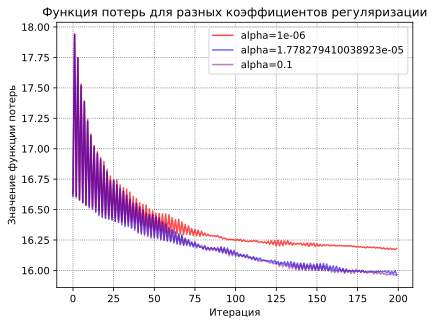

In [ ]:
plt.plot(np.arange(200), c_dict[c_values[0]]['loss_train'], color='red', label=f'alpha={c_values[0]}', alpha=0.7)
plt.plot(np.arange(200), c_dict[c_values[1]]['loss_train'], color='blue', label=f'alpha={c_values[1]}', alpha=0.6)
plt.plot(np.arange(200), c_dict[c_values[4]]['loss_train'], color='purple', label=f'alpha={c_values[4]}', alpha=0.5)
plt.legend()
plt.xlabel('Итерация')
plt.ylabel('Значение функции потерь')
plt.title('Функция потерь для разных коэффициентов регуляризации')
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.show()

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

ROC-AUC для текущих признаков: 0.625057783800832



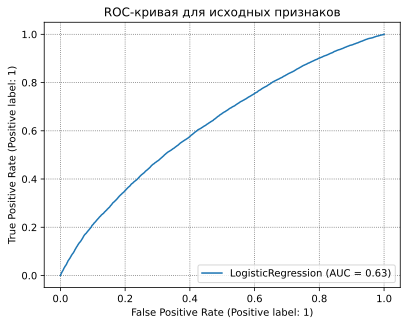

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
display_kaggle_roc = RocCurveDisplay.from_estimator(lg_clf, X_test, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая для исходных признаков')
print("ROC-AUC для текущих признаков:", display_kaggle_roc.roc_auc, end='\n\n')

__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

cat_inds = []

print(data.columns)
for ind, name in enumerate(data.columns):
    if name[-3:] == 'cat':
        cat_inds.append(ind)
print('Categorical columns indices:', cat_inds)

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X_train[:, cat_inds])
transformed = enc.transform(X_train[:, cat_inds]).toarray()
X_train_copy = X_train.copy()
X_train_copy = np.delete(X_train_copy, cat_inds, 1)
X_train_copy = np.concatenate((X_train_copy, transformed), 1)
print(X_train_copy)

[[0. 5. 1. ... 0. 0. 0.]
 [1. 3. 0. ... 0. 0. 1.]
 [6. 7. 0. ... 0. 0. 0.]
 ...
 [5. 3. 0. ... 0. 0. 0.]
 [0. 3. 1. ... 0. 0. 0.]
 [2. 3. 0. ... 0. 0. 0.]]


In [ ]:
from time import time
log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
time_init = time()
log_reg.fit(X_train_copy, y_train)
fit_time = time() - time_init

print("Время, потребовавшееся на обучение модели:", fit_time)

Время, потребовавшееся на обучение модели: 74.65279054641724


In [ ]:
X_test_copy = X_test.copy()
transformed_test = enc.transform(X_test[:, cat_inds]).toarray()
X_test_copy = X_test.copy()
X_test_copy = np.delete(X_test_copy, cat_inds, 1)
X_test_copy = np.concatenate((X_test_copy,transformed_test), 1)

ROC-AUC для текущих признаков: 0.6329452579144117



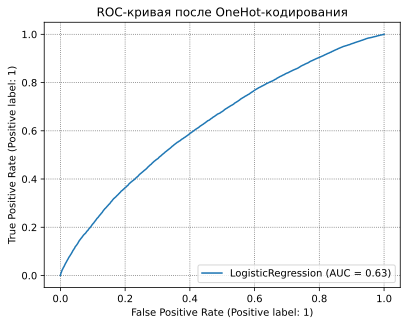

In [ ]:
display_kaggle_roc2 = RocCurveDisplay.from_estimator(log_reg, X_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после OneHot-кодирования')
print("ROC-AUC для текущих признаков:", display_kaggle_roc2.roc_auc, end='\n\n')

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам, расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [ ]:
## ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\

def target_noise_encoder(x, x_test, y, cat_inds):
    x_copy = x.copy()
    x_test_copy = x_test.copy()

    for ind in cat_inds:
        uniques = np.unique(x[:, ind])
        mean_uniques = dict()
        for u in uniques:
            u_inds = np.argwhere(x[:, ind] == u).flatten()
            y_values = y[u_inds]
            mean_target = y_values[y_values == 1].shape[0] / y_values.shape[0]
            x_copy[u_inds, ind] = mean_target
            mean_uniques[u] = mean_target
            x_copy[u_inds, ind] += np.random.normal(loc=0.0, scale=0.01, size=u_inds.shape[0])
        x_test_copy[:, ind] = np.array([mean_uniques[val] for val in x_test_copy[:, ind]])
        x_test_copy[:, ind] += np.random.normal(loc=0.0, scale=0.01, size=x_test_copy.shape[0])
    return x_copy, x_test_copy


time_start = time()
x_train_copy, x_test_copy = target_noise_encoder(X_train, X_test, y_train, cat_inds)
encoding_time = time() - time_start

new_log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
time_start = time()
new_log_reg.fit(x_train_copy, y_train)
fit_time = time() - time_start

print('Время кодирования признаков:', encoding_time)
print('Время обучения:', fit_time)

Время кодирования признаков: 0.7151486873626709
Время обучения: 37.3234224319458


ROC-AUC для текущих признаков: 0.6282368546466106



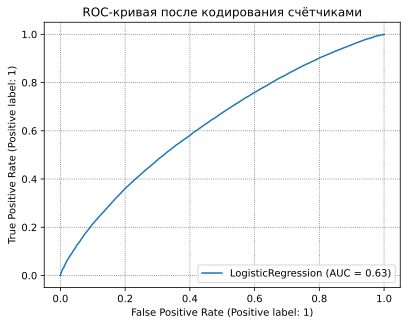

In [ ]:
display_target_roc = RocCurveDisplay.from_estimator(new_log_reg, x_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после кодирования счётчиками')
print("ROC-AUC для текущих признаков:", display_target_roc.roc_auc, end='\n\n')


**Ответ:** Видно, что такой способ кодирования улучшает качество, однако оно хуже, чем при OneHot-кодировании. Несмотря на это, число признаков значительно уменьшается, по сравнению с OneHot, что положительно сказывается на времени работы и на использовании памяти

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

__(+0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def target_noise_encoder_mod(x, x_test, y, cat_inds):
    x_copy = x.copy()
    x_test_copy = x_test.copy()

    for ind in cat_inds:
        uniques = np.unique(x[:, ind])
        mean_uniques = dict()
        for u in uniques:
            u_inds = np.argwhere(x[:, ind] == u).flatten()
            y_values = y[u_inds]
            mean_target = y_values.cumsum() - y_values
            means = mean_target[1:] / np.concatenate((np.array([1]), np.arange(1, mean_target[1:].shape[0])))
            mean_target =  np.concatenate((np.array([mean_target[0]]), means))
            x_copy[u_inds, ind] = mean_target
            mean_uniques[u] = y_values[y_values == 1].shape[0] / y_values.shape[0]
            x_copy[u_inds, ind] += np.random.normal(loc=0.0, scale=0.01, size=u_inds.shape[0])
        x_test_copy[:, ind] = np.array([mean_uniques[val] for val in x_test_copy[:, ind]])
        x_test_copy[:, ind] += np.random.normal(loc=0.0, scale=0.01, size=x_test_copy.shape[0])
    return x_copy, x_test_copy


time_start = time()
x_train_copy, x_test_copy = target_noise_encoder_mod(X_train, X_test, y_train, cat_inds)
encoding_time = time() - time_start

new_log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
time_start = time()
new_log_reg.fit(x_train_copy, y_train)
fit_time = time() - time_start

print('Время кодирования признаков:', encoding_time)
print('Время обучения:', fit_time)


Время кодирования признаков: 0.849785327911377
Время обучения: 24.696516275405884


ROC-AUC для текущих признаков: 0.6273874106343786



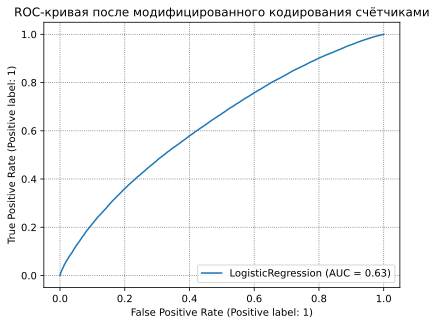

In [ ]:
display_target_new_roc = RocCurveDisplay.from_estimator(new_log_reg, x_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после модифицированного кодирования счётчиками')
print("ROC-AUC для текущих признаков:", display_target_new_roc.roc_auc, end='\n\n')

ROC-AUC для текущих признаков: 0.6299927210718952



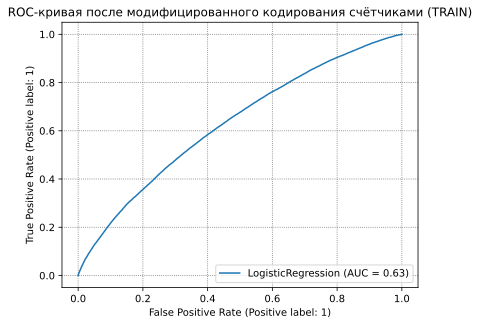

In [ ]:
display_target_new_roc = RocCurveDisplay.from_estimator(new_log_reg, x_train_copy, y_train)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после модифицированного кодирования счётчиками (TRAIN)')
print("ROC-AUC для текущих признаков:", display_target_new_roc.roc_auc, end='\n\n')

Такой подход также увеличивает качество. Однако в сравнении с предыдущим обычным способом таргет-кодирования с зашумлением, качество стало незначительно хуже. Это, вероятно, из-за того, что мы избавляемся от переобучения, исключая таргет для конкретного объекта при кодировании категорий.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def target_noise_encoder_smooth(x, x_test, y, cat_inds):
    x_copy = x.copy()
    x_test_copy = x_test.copy()

    # prior
    global_mean = np.mean(y)

    C = 10

    for ind in cat_inds:
        uniques = np.unique(x[:, ind])
        mean_uniques = dict()
        for u in uniques:
            u_inds = np.argwhere(x[:, ind] == u).flatten()
            y_values = y[u_inds]
            mean_target = (y_values[y_values == 1].shape[0] + C * global_mean) / (y_values.shape[0] + C)
            x_copy[u_inds, ind] = mean_target
            mean_uniques[u] = mean_target
            x_copy[u_inds, ind] += np.random.normal(loc=0.0, scale=0.01, size=u_inds.shape[0])
        x_test_copy[:, ind] = np.array([mean_uniques[val] for val in x_test_copy[:, ind]])
        x_test_copy[:, ind] += np.random.normal(loc=0.0, scale=0.01, size=x_test_copy.shape[0])
    return x_copy, x_test_copy


time_start = time()
x_train_copy, x_test_copy = target_noise_encoder_smooth(X_train, X_test, y_train, cat_inds)
encoding_time = time() - time_start

new_log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
time_start = time()
new_log_reg.fit(x_train_copy, y_train)
fit_time = time() - time_start

print('Время кодирования признаков:', encoding_time)
print('Время обучения:', fit_time)

Время кодирования признаков: 0.7601869106292725
Время обучения: 36.61979699134827


ROC-AUC для текущих признаков: 0.6280273154435934



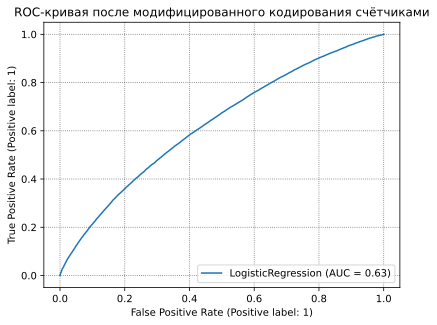

In [ ]:
display_target_new_roc_smooth = RocCurveDisplay.from_estimator(new_log_reg, x_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после модифицированного кодирования счётчиками')
print("ROC-AUC для текущих признаков:", display_target_new_roc_smooth.roc_auc, end='\n\n')

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:**

В ответ на предыдущий вопрос, если категория встречается в выборке всего несколько раз, то любая статистика, вычисленная на этой категории будет далеко не точной.

*Плюсы:*

1. Не увеличивается пространство признаков
2. Сохраняется исходная зависимость между признаком и целевой переменной

*Минусы:*

1. Возможная утечка данных из-за использования целевой переменной в вычислениях
2. Возможное переобучение
3. Качество немного ниже

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)
X_train = X_train.to_numpy()

In [ ]:
X_test = X_test.to_numpy()

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train[:, cat_inds])
transformed = enc.transform(X_train[:, cat_inds]).toarray()
X_train = np.delete(X_train, cat_inds, 1)
X_train = np.concatenate((X_train, transformed), 1)
print('Число признаков:', X_train.shape[1])

Число признаков: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LogisticRegression
start_time = time()
logreg = LogisticRegression(max_iter=2000, n_jobs=-1)
logreg.fit(X_train, y_train)
fit_time = time() - start_time
print("Время обучения:", fit_time)

Время обучения: 189.27565598487854


In [ ]:
transformed_test = enc.transform(X_test[:, cat_inds]).toarray()
X_test = np.delete(X_test, cat_inds, 1)
X_test = np.concatenate((X_test, transformed_test), 1)
print('Число признаков:', X_test.shape[1])

Число признаков: 227


ROC-AUC для текущих признаков: 0.6380743329050445



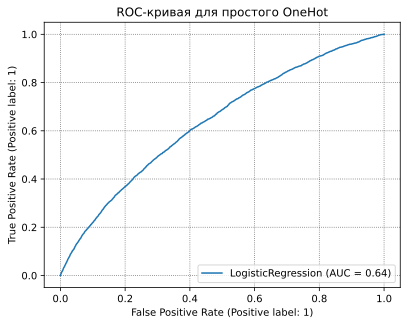

In [ ]:
from sklearn.metrics import RocCurveDisplay

display_roc = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая для простого OneHot')
print("ROC-AUC для текущих признаков:", display_roc.roc_auc, end='\n\n')

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

time_start = time()
args = np.argsort(np.abs(logreg.coef_))
args_del = args[0][:27]

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train_copy = np.delete(X_train_copy, args_del, axis=1)
X_test_copy = np.delete(X_test_copy, args_del, axis=1)
fit_time = time() - time_start

print("Время отбора признаков:", fit_time)

Время отбора признаков: 1.8698408603668213


In [ ]:
log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
log_reg.fit(X_train_copy, y_train)

LogisticRegression(max_iter=2000, n_jobs=-1)

ROC-AUC для отобранных признаков: 0.6383119518880737



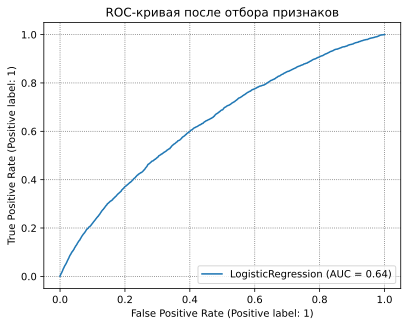

In [ ]:
display_roc = RocCurveDisplay.from_estimator(log_reg, X_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после отбора признаков')
print("ROC-AUC для отобранных признаков:", display_roc.roc_auc, end='\n\n')

Видим, что качесто незначительно, но улучшилось после отбора признаков

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_copy = scaler.transform(X_train)
X_test_copy = scaler.transform(X_test)

In [ ]:
start_time = time()
logreg = LogisticRegression(max_iter=2000, n_jobs=-1)
logreg.fit(X_train_copy, y_train)
fit_time = time() - start_time
print("Время обучения:", fit_time)

Время обучения: 195.21096396446228


ROC-AUC для текущих признаков: 0.638038642953794



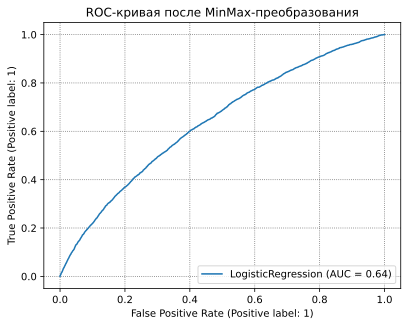

In [ ]:
display_roc = RocCurveDisplay.from_estimator(logreg, X_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после MinMax-преобразования')
print("ROC-AUC для текущих признаков:", display_roc.roc_auc, end='\n\n')

In [ ]:
time_start = time()
args = np.argsort(np.abs(logreg.coef_))
args_del = args[0][:27]

X_train_copy = np.delete(X_train_copy, args_del, axis=1)
X_test_copy = np.delete(X_test_copy, args_del, axis=1)
fit_time = time() - time_start

print("Время отбора признаков:", fit_time)

Время отбора признаков: 1.8825488090515137


In [ ]:
log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
log_reg.fit(X_train_copy, y_train)

LogisticRegression(max_iter=2000, n_jobs=-1)

ROC-AUC для отобранных признаков: 0.638224887530962



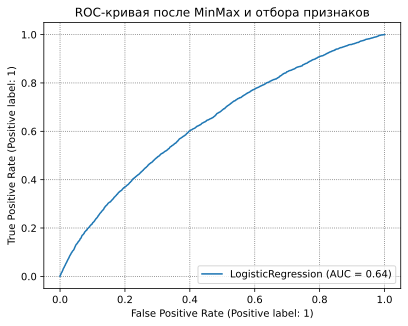

In [ ]:
display_roc = RocCurveDisplay.from_estimator(log_reg, X_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после MinMax и отбора признаков')
print("ROC-AUC для отобранных признаков:", display_roc.roc_auc, end='\n\n')

Качество незначительно ухудшилось после нормировки всех признаков через MinMax-преобразование и отбора признаков в сравнении с обычным отбором. Необходимо проверить StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_copy = scaler.transform(X_train)
X_test_copy = scaler.transform(X_test)

In [ ]:
start_time = time()
logreg = LogisticRegression(max_iter=2000, n_jobs=-1)
logreg.fit(X_train_copy, y_train)
fit_time = time() - start_time
print("Время обучения:", fit_time)

Время обучения: 15.904027700424194


ROC-AUC для текущих признаков: 0.6380813813274766



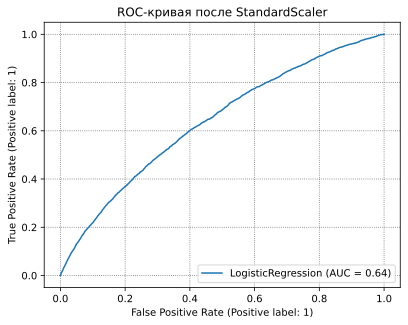

In [ ]:
display_roc = RocCurveDisplay.from_estimator(logreg, X_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после StandardScaler')
print("ROC-AUC для текущих признаков:", display_roc.roc_auc, end='\n\n')

In [ ]:
time_start = time()
args = np.argsort(np.abs(logreg.coef_))
args_del = args[0][:27]

In [ ]:
X_train_copy = np.delete(X_train_copy, args_del, axis=1)
X_test_copy = np.delete(X_test_copy, args_del, axis=1)
fit_time = time() - time_start

print("Время отбора признаков:", fit_time)

Время отбора признаков: 1.5098536014556885


ROC-AUC для отобранных признаков: 0.6380481908024979



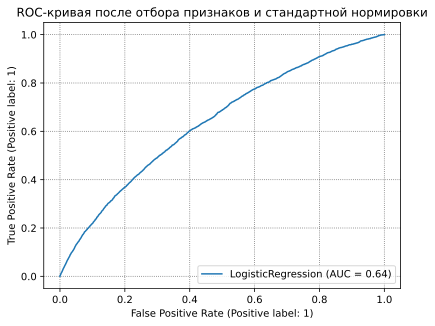

In [ ]:
log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
log_reg.fit(X_train_copy, y_train)

display_roc = RocCurveDisplay.from_estimator(log_reg, X_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после отбора признаков и стандартной нормировки')
print("ROC-AUC для отобранных признаков:", display_roc.roc_auc, end='\n\n')

Видно, что подход: "нормировка + отбор признаков" даёт небольшое ушудшение по качеству, чем обычный отбор признаков. Однако этот подход является более корректным, так как мы учитываем разный вклад признаков.

При этом видно, что MinMax-преобразование отработало лучше, чем StandardScaler

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def t_statistics(feature, target):
    feature_pos = feature[target == 1]
    feature_neg = feature[target == 0]

    mean_abs_diff = np.abs(np.mean(feature_pos) - np.mean(feature_neg))
    var_pos = np.std(feature_pos) ** 2
    var_neg = np.std(feature_neg) ** 2
    n_pos = feature_pos.shape[0]
    n_neg = feature_neg.shape[0]

    return mean_abs_diff / np.sqrt((n_pos * var_pos + n_neg * var_neg) / feature.shape[0])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_copy = scaler.transform(X_train)
X_test_copy = scaler.transform(X_test)


time_start = time()
get_t_stats = np.array([t_statistics(col, y_train) for col in X_train_copy.T])
inds = np.argsort(get_t_stats)
inds_del = inds[:27]

X_train_copy = np.delete(X_train_copy, inds_del, axis=1)
X_test_copy = np.delete(X_test_copy, inds_del, axis=1)
fit_time = time() - time_start

print("Время отбора признаков:", fit_time)

Время отбора признаков: 3.8230888843536377


ROC-AUC для фильтрации и отбора: 0.6385612409122504



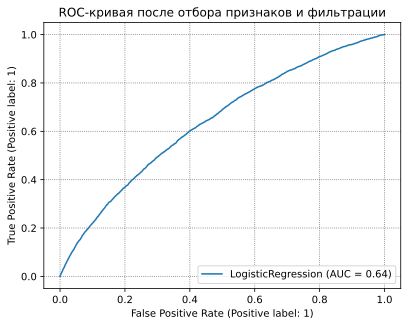

In [ ]:
log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
log_reg.fit(X_train_copy, y_train)

display_roc = RocCurveDisplay.from_estimator(log_reg, X_test_copy, y_test)
plt.grid(alpha=0.6, linestyle=':', color='black')
plt.title('ROC-кривая после отбора признаков и фильтрации')
print("ROC-AUC для фильтрации и отбора:", display_roc.roc_auc, end='\n\n')

Видим, что подход с OneHot-кодированием, нормализацией через MinMax-преобразование и фильтрацией признаков через t-статистику улучшает качество модели.

### Методы-обёртки

__Задание 10.__

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

new_x_train, new_x_test, new_y_train, new_y_test, = train_test_split(X_train, y_train, test_size=0.2, random_state=124)

In [ ]:
# Используем PipeLine и ColumnTransformer для упрощения работы с преобразованиями
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

one_hot_transformer = ColumnTransformer([('OneHot', OneHotEncoder(sparse_output=False), make_column_selector(pattern='.*_cat'))], remainder='passthrough')

features_remained = np.arange(227)
delete_ind = 0

column_dropper = ColumnTransformer([('dropper', 'passthrough', np.delete(features_remained, delete_ind))])
pipe = Pipeline([('OneHot', one_hot_transformer), ('MinMax', MinMaxScaler()), ('drop_column', column_dropper), ('LogReg', LogisticRegression(max_iter=2000, n_jobs=-1))])

In [ ]:
start_time = time()
fitted_model = pipe.fit(new_x_train, new_y_train)
finish_time = time() - start_time

print('Время работы одной итерации обучения модели:', finish_time)

Время работы одной итерации обучения модели: 119.9321711063385


Одна итерация обучения в данном подходе занимает около $120$ секунд. Наша задача - перебрать все 227 признаков, проверить какой из них самый худший, удалить, повторить уже с 226 признаками и проделать то же самое, пока не останется 200 признаков. Число итераций в данном подходе составит $\sum_{i = 201}^{227}i = \dfrac{227 + 201}{2} \cdot 26$. Время работы алгоритма составит приблизительно $667680$ секунд, а это примерно $1855$ часов

Случайным образом выделим на отбор признаков $10000$ объектов обучающей выборки. Будем удалять сразу по 5 признаков, чтобы в итоге за 5 общих итераций отобрать 25 худших, а далее отобрать последние 2 худших признака

In [ ]:
from random import randint, seed

In [ ]:
seed(124)

objects_count = 10000

while True:
    new_sample_ind = randint(0, new_x_train.shape[0])
    if one_hot_transformer.fit_transform(new_x_train[new_sample_ind:new_sample_ind + objects_count]).shape[1] == 227:
        break
print(new_sample_ind)

281893


In [ ]:
print(one_hot_transformer.fit_transform(new_x_train[new_sample_ind:new_sample_ind + objects_count]).shape)

(10000, 227)


In [ ]:
new_x_train = new_x_train.iloc[new_sample_ind:new_sample_ind + objects_count]
new_y_train = new_y_train[new_sample_ind:new_sample_ind + objects_count]

In [ ]:
from sklearn.metrics import roc_curve
features_remained = np.arange(227)

for iter in tqdm(range(5)):
    worst_auc = 1.0
    worst_indices = range(5)
    np.random.seed(iter)
    np.random.shuffle(features_remained)
    for index in tqdm(range(0, features_remained.shape[0] - 4, 5)):
        delete_ind = range(index, index + 5)
        column_dropper = ColumnTransformer([('dropper', 'passthrough', np.delete(features_remained, delete_ind))])
        pipe = Pipeline([('OneHot', one_hot_transformer), ('MinMax', MinMaxScaler()), ('drop_column', column_dropper), ('LogReg', LogisticRegression(max_iter=2000, n_jobs=-1))])

        fitted_model = pipe.fit(new_x_train, new_y_train)
        fpr, tpr, _ = roc_curve(new_y_test, fitted_model.decision_function(new_x_test))
        current_auc = auc(fpr, tpr)
        if current_auc < worst_auc:
            worst_auc = current_auc
            worst_indices = delete_ind
    features_remained = np.delete(features_remained, worst_indices)

print('Число отобранных признаков:', features_remained.shape[0])
print('Номера отобранных признаков:', features_remained)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Число отобранных признаков: 202
Номера отобранных признаков: [106 154 149  57  29  88 210   2 138 119 125 114 178 133 205 215 209  83
 129 108  77 169  34 214 216 136 188 130 153 115 187  39 177  27  97  84
 121 193 182  66  42 150  95 116 102 226  87  49 158 107 151  61  37 132
  13   3 189  59 190 145 198 163 113 213 171  23  17 147 211   0 131  26
 139 223 101  85 148 204  78  16  47   7  65  24  38  69 142  55  92  46
 109 135  62 218   1 167  28 160 118 122 124  94 172 111  64 212  31 186
 174 219  90  44 176 173 220  73 112 140  14 156  79   4 179  30 144  25
  68  80  54  20 166  81 221  60 181  43 161 164  50 162 199  96   5  40
  71 128 185  45  21 206  63  41 203  33  35 137 194 100  70  52 126  99
 104  93 152  82  89  22 222 191 165 224  91  48 180 127  51  86 170 105
 201 207  76 110  10  32 168 159 202  53 184  74  12  75 157 134 120 155
 225  98 175  72]


In [ ]:
for iter in tqdm(range(2)):
    worst_auc = 1.0
    worst_indices = range(1)
    np.random.seed(iter)
    np.random.shuffle(features_remained)
    for index in tqdm(range(features_remained.shape[0])):
        delete_ind = [index]
        column_dropper = ColumnTransformer([('dropper', 'passthrough', np.delete(features_remained, delete_ind))])
        pipe = Pipeline([('OneHot', one_hot_transformer), ('MinMax', MinMaxScaler()), ('drop_column', column_dropper), ('LogReg', LogisticRegression(max_iter=2000, n_jobs=-1))])

        fitted_model = pipe.fit(new_x_train, new_y_train)
        fpr, tpr, _ = roc_curve(new_y_test, fitted_model.decision_function(new_x_test))
        current_auc = auc(fpr, tpr)
        if current_auc < worst_auc:
            worst_auc = current_auc
            worst_indices = delete_ind
    features_remained = np.delete(features_remained, worst_indices)

print('Число отобранных признаков:', features_remained.shape[0])
print('Номера отобранных признаков:', features_remained)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Число отобранных признаков: 200
Номера отобранных признаков: [ 68 159 189 184  86 104 179 130 170 193 165  34  89  25 154 158 102  49
 223  82  24 153  27 222   3 191 177  85 122  75  55 168 181  98  73  38
 174  48 218  93  92   0  64  42  47 187 101 144  31 106 112 134  94  65
 160  44 136  97   5  91 180 142 116 221 188 166 110  74 176  14  13 171
 206 157 167  77  22 214 207 215 105  37 132 124  87  43 210  35  50 147
 204 213  66  20  39 190  60  90 151 140  59  16  46 128 125 182 186 162
 113  10  88 133 129  53 205  69  62 216 111 161 220 138  76  71 120  95
  41 119 145 194 163  63 155   7  70 148  52  57 203 115   1  83  72 107
 131  33   2  17  80 150 202  32 219 173 198 118  45  40 212 211 121 209
  78  99  21 178  81 152 224 126 226  28 108 185  12 172 149  51  61  26
  84  54 100 114  79 225 127 139  30 137 109 175  23 169  96   4 135 164
 156  29]


In [ ]:
column_dropper = ColumnTransformer([('dropper', 'passthrough', features_remained)])
pipe = Pipeline([('OneHot', one_hot_transformer), ('MinMax', MinMaxScaler()), ('drop_column', column_dropper), ('LogReg', LogisticRegression(max_iter=2000, n_jobs=-1))])
time_start = time()
fitted_model = pipe.fit(X_train, y_train)
end_fit_time = time() - time_start
fpr, tpr, _ = roc_curve(y_test, fitted_model.predict_proba(X_test)[:, 1], pos_label=1)
print('Время обучения:', end_fit_time)
print('Полученное качество на тестовой выборке:', auc(fpr, tpr))

Время обучения: 170.2342872619629
Полученное качество на тестовой выборке: 0.6160398730265633


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**
Каждый из методов позволяет уменьшить признаковое пространство, увеличив точность модели. При этом уменьшается время обучения, когда признаки уже отобраны

Лучшим оказался подход с OneHot-кодированием, нормализацией признаков через MinMax-преобразование и отбор признаков через t-статистику с показателем $AUC = 0.63856$

**Метод линейной модели**

Плюсы:
* Быстро работает
* Качество незначительно увеличивается

Минусы:
* При нормировке качество может упасть

**Метод t-статистики**

Плюсы:
* Быстро работает
* Точность максимальная из всех методов

Минусы:
* Не замечены

**Метод жадного перебора**

Плюсы:
* Интерпретируемость

Минусы:
* Очень долго работает
* Качество ухудшилось


## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку.

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты.

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
data = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Доля положительных примеров в обучающей выборке:', np.count_nonzero(y_train) / y_train.shape[0])
print('Доля положительных примеров в тестовой выборке:', np.count_nonzero(y_test) / y_test.shape[0])

Доля положительных примеров в обучающей выборке: 0.036484945471040746
Доля положительных примеров в тестовой выборке: 0.03629780835496417


Доля положительных примеров = $3$%. Страховой выгодно, чтобы клиенты обращались реже

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cat_inds = []

print(data.columns)
for ind, name in enumerate(data.columns):
    if name[-3:] == 'cat':
        cat_inds.append(ind)

one_hot_transformer = ColumnTransformer([('OneHot', OneHotEncoder(handle_unknown="ignore", sparse_output=False), make_column_selector(pattern='.*_cat'))], remainder='passthrough')
transformer_fitted = one_hot_transformer.fit(X_train)
X_train_encoded = transformer_fitted.transform(X_train)
X_test_encoded = transformer_fitted.transform(X_test)

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [ ]:
column_dropper = ColumnTransformer([('dropper', 'passthrough', np.delete(np.arange(X_train_encoded.shape[1]), cat_inds))])
dropper_fitted = column_dropper.fit(X_train_encoded)
X_train_encoded = dropper_fitted.transform(X_train_encoded)
X_test_encoded = dropper_fitted.transform(X_test_encoded)

In [ ]:
print('Количество признаков на данный момент:', X_train_encoded.shape[1])

Количество признаков на данный момент: 213
14


В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pipe = Pipeline([('LogReg', LogisticRegression(max_iter=2000, n_jobs=-1))])
pipe.fit(X_train_encoded, y_train)
preds = pipe.predict_proba(X_test_encoded)[:, 1]
print(preds)

[0.15402188 0.03842056 0.03402911 ... 0.03673379 0.03630027 0.02284143]


Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fpr, tpr, _ = roc_curve(y_test, pipe.decision_function(X_test_encoded))
print('ROC-AUC:', auc(fpr, tpr))

ROC-AUC: 0.6353936165282416


ROC-AUC не такой высокий, что говорит о зашумлённости данных, редкости страховых случаев

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

PR-AUC: 0.06399876122054522



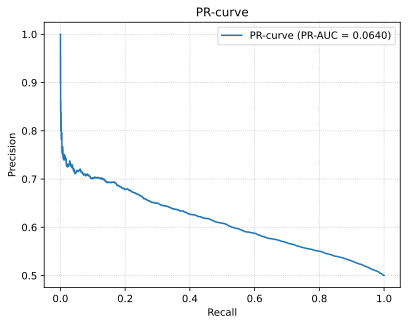

In [126]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
precision, recall, pr_thresholds = precision_recall_curve(y_test, pipe.predict_proba(X_test_encoded)[:, 1])
print("PR-AUC:", auc(recall, precision), end='\n\n')
plt.plot(temp_recall, temp_precision, label='PR-curve (PR-AUC = %.4f)' % auc(recall, precision))
plt.grid(alpha=0.8, linestyle=':')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR-curve')
plt.legend()
plt.show()

Видно, что при нулевом recall точность сильно падает, что говорит о большом проценте ошибок - при отборе объектов увеличивается не $TPR$, а $FPR$

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положительных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

Ищем порог для $precision = 95$% и максимального $recall$

In [141]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Нужный recall:', recall[precision >= 0.95])
print(recall[-3:])
print('Precision:', precision)
print('Recall:', recall)
print('Thresholds', pr_thresholds)
print('Нужный порог:', pr_thresholds[-3])

Нужный recall: [0.00046286 0.00023143 0.        ]
[0.00046286 0.00023143 0.        ]
Precision: [0.03629781 0.03629811 0.03629842 ... 1.         1.         1.        ]
Recall: [1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 4.6285582e-04 2.3142791e-04
 0.0000000e+00]
Thresholds [0.00827907 0.00876733 0.00892823 ... 0.46918471 0.48577501 0.51547969]
Нужный порог: 0.46918471357499597


In [142]:
print(f'При пороге {pr_thresholds[-3]} имеем precision = {precision[-3]} и recall = {recall[-3]}')

При пороге 0.46918471357499597 имеем precision = 1.0 и recall = 0.0004628558204119417


Precision = 1, а recall $\neq 0$ $\rightarrow$ мы отказываем только одному клиенту, который обратился по страховому случаю. Это значит, что мы не теряем ни одного потенциального клиента, который принесёт нам прибыль

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился.

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [144]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

thresholds = np.array([])
balance_max = -1
best_thresh = -1

for i in tqdm(range(pr_thresholds.shape[0])):
    predictions = np.where(preds >= pr_thresholds[i], 1, 0)
    balance = np.count_nonzero((predictions == 1) & (y_test == 1)) * 100000 - np.count_nonzero((predictions == 1)) * 5000

    if balance > 0:
        thresholds = np.append(thresholds, pr_thresholds[i])
        if balance > balance_max:
            balance_max = balance
            best_thresh = pr_thresholds[i]

  0%|          | 0/119043 [00:00<?, ?it/s]

In [145]:
print('Число порогов, при которых баланс больше нуля:', thresholds.shape[0])

Число порогов, при которых баланс больше нуля: 57824


In [147]:
print('Значения порогов:', *thresholds)

Значения порогов: 0.03213269596603424 0.032132984409285484 0.0321333526329228 0.032133657380723324 0.03213368696194023 0.03213478065806156 0.03213486983331993 0.03213566989031881 0.032135790515927416 0.032135830343096604 0.032136001130110295 0.03213605792366705 0.03213606356622938 0.03213640521285062 0.03213683205997119 0.03213729846448068 0.03213739718163395 0.03213748161936641 0.032138093569792615 0.032138185114783786 0.03213873762934531 0.03213931273929911 0.03213931948526625 0.032139723537022546 0.03213993987568236 0.032140150706063776 0.03214042655007833 0.03214050747768701 0.03214051538422196 0.032141247230579754 0.0321413624391652 0.03214141119317274 0.03215336604654984 0.03215360569368039 0.032153756224726215 0.0321538563425626 0.032153878756616724 0.0321538842675773 0.03215415428946249 0.03215482260993131 0.03215503591769337 0.032155283595037554 0.03215561397629116 0.03215616958248817 0.0321585192397635 0.03215859233809757 0.03215922408235327 0.03215924792519441 0.032159251140

А на каком значение порога это разница максимальна? Скольким клиентам мы отказали в обслуживании?

In [148]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(f'При пороге {best_thresh} разница максимальна')

При пороге 0.04972983671691195 разница максимальна


In [149]:
new_preds = np.where(preds >= best_thresh, 1, 0)
print(f'Откажем {np.count_nonzero(new_preds)} клиентам')

Откажем 20189 клиентам


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ